In [1]:
## libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## 1.Read/ load the Dataset
Retail_df=pd.read_csv("C:\\Users\\patil\\Downloads\\retail_sales_dataset.csv")
print(Retail_df)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50

In [3]:
## 1. Data Cleaning
Retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
# Reset index to start from 1
Retail_df.index = range(1, len(Retail_df) + 1)

print(Retail_df)

      Transaction ID        Date Customer ID  Gender  Age Product Category  \
1                  1  2023-11-24     CUST001    Male   34           Beauty   
2                  2  2023-02-27     CUST002  Female   26         Clothing   
3                  3  2023-01-13     CUST003    Male   50      Electronics   
4                  4  2023-05-21     CUST004    Male   37         Clothing   
5                  5  2023-05-06     CUST005    Male   30           Beauty   
...              ...         ...         ...     ...  ...              ...   
996              996  2023-05-16     CUST996    Male   62         Clothing   
997              997  2023-11-17     CUST997    Male   52           Beauty   
998              998  2023-10-29     CUST998  Female   23           Beauty   
999              999  2023-12-05     CUST999  Female   36      Electronics   
1000            1000  2023-04-12    CUST1000    Male   47      Electronics   

      Quantity  Price per Unit  Total Amount  
1            3  

In [5]:
## 2.Descriptive Statistics: method1
print(Retail_df['Total Amount'].mean())
print(Retail_df['Total Amount']. median())
print(Retail_df['Total Amount'].std())
print("Mode:")
print(Retail_df[['Quantity', 'Price per Unit', 'Total Amount']].mode())

456.0
135.0
559.997631555123
Mode:
   Quantity  Price per Unit  Total Amount
0         4              50            50


In [6]:
## Descriptive Statistics: method2
print("Descriptive Statistics:")
print(Retail_df[['Quantity', 'Price per Unit', 'Total Amount']].describe())

print("Mode:")
print(Retail_df[['Quantity', 'Price per Unit', 'Total Amount']].mode())


Descriptive Statistics:
          Quantity  Price per Unit  Total Amount
count  1000.000000     1000.000000   1000.000000
mean      2.514000      179.890000    456.000000
std       1.132734      189.681356    559.997632
min       1.000000       25.000000     25.000000
25%       1.000000       30.000000     60.000000
50%       3.000000       50.000000    135.000000
75%       4.000000      300.000000    900.000000
max       4.000000      500.000000   2000.000000
Mode:
   Quantity  Price per Unit  Total Amount
0         4              50            50


In [7]:
Retail_df['Date'] = pd.to_datetime(Retail_df['Date'])

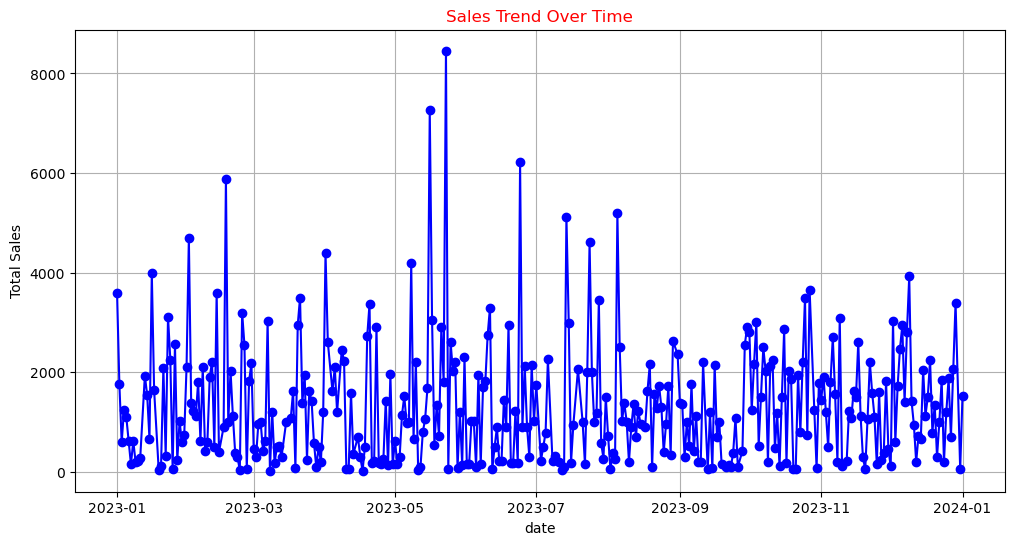

In [8]:
##3.Time Series Analysis:
sales_trend = Retail_df.groupby('Date')['Total Amount'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_trend, color="blue", marker='o', linestyle='-')
plt.title("Sales Trend Over Time",color="red")
plt.xlabel("date",color="black")
plt.ylabel("Total Sales",color="black")
plt.grid()
plt.show()

C:\Users\patil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


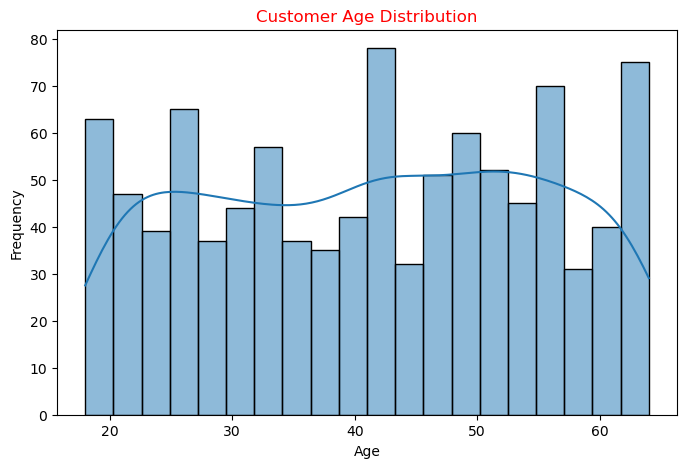

In [9]:
## 4.Customer and Product Analysis:
# 1.Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(Retail_df['Age'], bins=20, kde=True)
plt.title("Customer Age Distribution",color="Red")
plt.xlabel("Age",color="black")
plt.ylabel("Frequency",color="black")
plt.show()

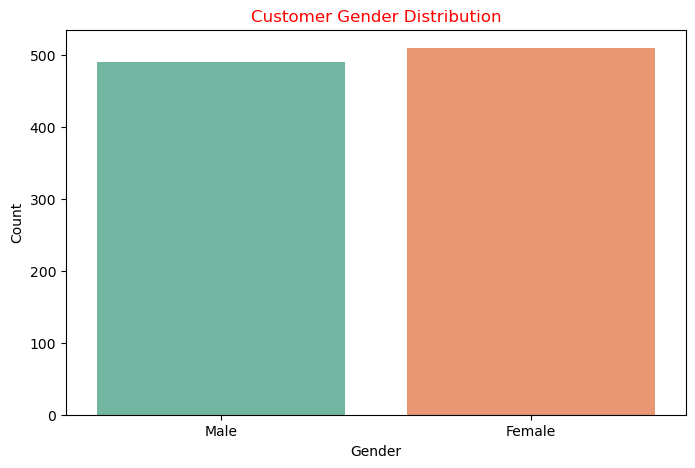

In [10]:
## 2.Customer Analysis
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=Retail_df, palette='Set2')
plt.title("Customer Gender Distribution",color="red")
plt.xlabel("Gender",color="black")
plt.ylabel("Count",color="black")
plt.show()


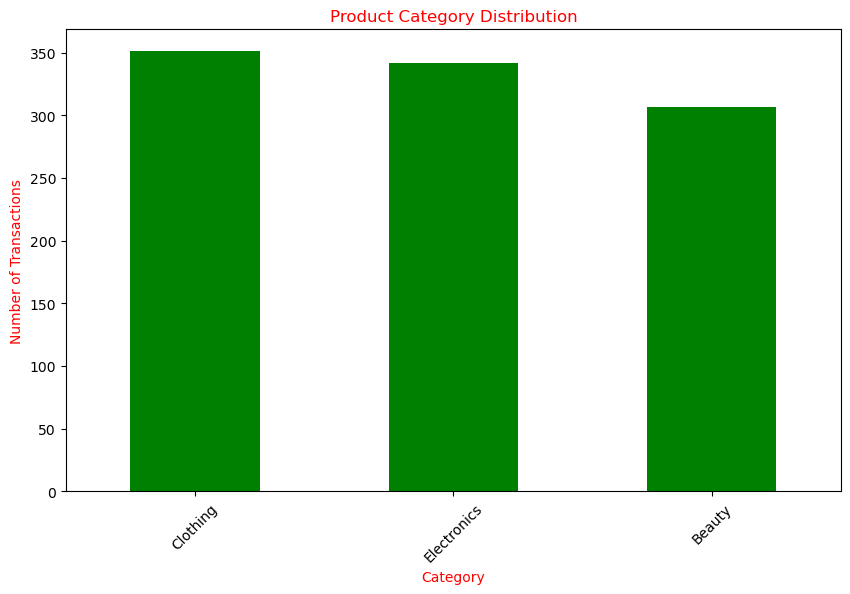

In [11]:
#3. Product Category Analysis
plt.figure(figsize=(10, 6))
Retail_df['Product Category'].value_counts().plot(kind='bar', color='green')
plt.title("Product Category Distribution",color="red")
plt.xlabel("Category",color="red")
plt.ylabel("Number of Transactions",color="red")
plt.xticks(rotation=45)
plt.show()

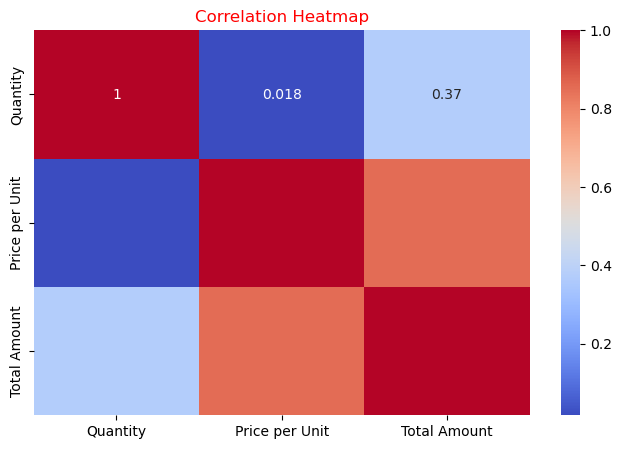

In [12]:
# Heatmap for correlation analysis
plt.figure(figsize=(8, 5))
sns.heatmap(Retail_df[['Quantity', 'Price per Unit', 'Total Amount']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap",color="red")
plt.show()